## Download image from coordinates

In [1]:
import os
import sys

current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, project_root)
os.chdir(project_root)

In [2]:
print(project_root)

c:\Users\XPRISTO\OneDrive\Bureau\model_deployement


In [3]:
from utils.geometry_utils import create_square_polygon
from src.download_maps_images import MapboxStaticTiles
from config.config import DEFAULT_ZOOM  , gdf , image_width, image_height
from utils.visualization_utils import generate_colored_masks, process_display_image , convert_to_kml , display_image
from src.annotation_shapefile import convert_annotations_to_polygons , calculate_image_bounds 

import geopandas as gpd
import os
import logging

In [11]:
gdf.head()

,farmer_id,parcel_id,province,crops_grou,country,date,crops_vari,crops_spec,geometry
0,8a2235c1-8ca1-490e-96ef-4d5f1d05d843,62f6d924-a257-4847-bb67-ad63c1eebb21,Sefrou,Céréales,Morocco,2023-11-07,FAIZA,Blé tendre,"POLYGON ((-4.72825 33.98959, -4.72894 33.99098..."
1,8a2235c1-8ca1-490e-96ef-4d5f1d05d843,fa2d3722-d8d3-4787-9ac1-69aaadd8962b,Sefrou,Céréales,Morocco,2023-11-06,AMIRA,Orge,"POLYGON ((-4.71696 33.99802, -4.71715 33.99777..."
2,8a2235c1-8ca1-490e-96ef-4d5f1d05d843,3f306e5e-6828-4faa-9e23-07ce03ad4b9a,Sefrou,Céréales,Morocco,2023-11-06,AMIRA,Orge,"POLYGON ((-4.65290 33.94276, -4.65313 33.94257..."
3,e995a401-b274-456b-bdf3-d51442ee234f,cf5c635d-c4e0-4d51-a1a7-08cb42624d1d,Sefrou,Céréales,Morocco,2023-11-21,FAIZA,Blé tendre,"POLYGON ((-4.74530 34.07102, -4.74563 34.07078..."
4,e995a401-b274-456b-bdf3-d51442ee234f,386ba455-1e4c-4cb3-9d0f-04970defce47,Sefrou,Céréales,Morocco,2023-12-19,FAIZA,Blé tendre,"POLYGON ((-4.74258 34.07993, -4.74277 34.07747..."


In [13]:
polygones_1 = gdf['geometry'][6]
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
square_polygon_wkt , centroid  = create_square_polygon(str(polygones_1), square_size_km=2)
image_path = "./test_image6.jpg"
saved_path = MapboxStaticTiles.get_static_map(square_polygon_wkt,image_path)
saved_path

2024-07-25 14:27:22,802 - INFO - Tile downloaded and saved successfully to ./test_image6.jpg


'./test_image6.jpg'

2024-07-25 14:01:23,702 - INFO - Full path of the image: ./test_image4.jpg
2024-07-25 14:01:23,750 - INFO - Image dimensions: 1224x1224 pixels


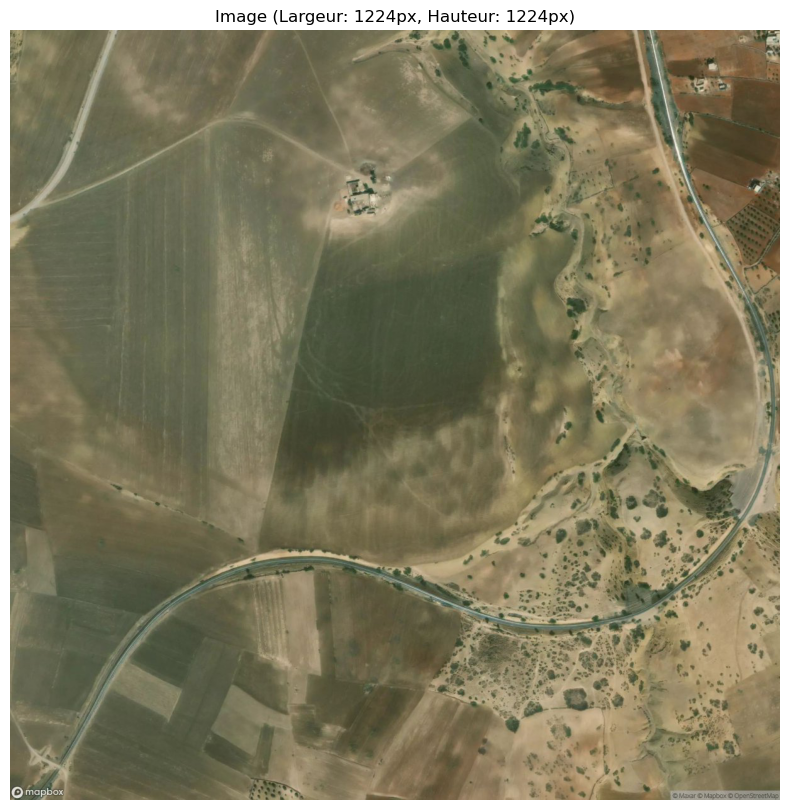

In [6]:
import os
import logging
from PIL import Image

if os.path.isfile(saved_path):
   logging.info(f"Full path of the image: {saved_path}")
   with Image.open(saved_path) as img:
       width, height = img.size
       logging.info(f"Image dimensions: {width}x{height} pixels")
   display_image(saved_path)
else:
   if os.path.isdir(saved_path):
       image_files = [f for f in os.listdir(saved_path) if f.endswith('.png') or f.endswith('.jpg')]
       if image_files:
           image_file = image_files[0]
           full_image_path = os.path.join(saved_path, image_file)
           logging.info(f"Full path of the image: {full_image_path}")
           with Image.open(full_image_path) as img:
               width, height = img.size
               logging.info(f"Image dimensions: {width}x{height} pixels")
           display_image(full_image_path)
       else:
           logging.warning("No images found in the directory.")
   else:
       logging.error(f"The path {saved_path} is neither a valid file nor a directory.")

2024-07-08 00:37:44,417 - INFO - [DetectionCheckpointer] Loading from /Users/Hiba/satellite-imagery-pfe/data/model_final.pth ...
2024-07-08 00:37:44,418 - INFO - [Checkpointer] Loading from /Users/Hiba/satellite-imagery-pfe/data/model_final.pth ...
/Users/Hiba/anaconda3/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Predicted annotation saved in '/Users/Hiba/satellite-imagery-pfe/data/feild_del/annotations.json'


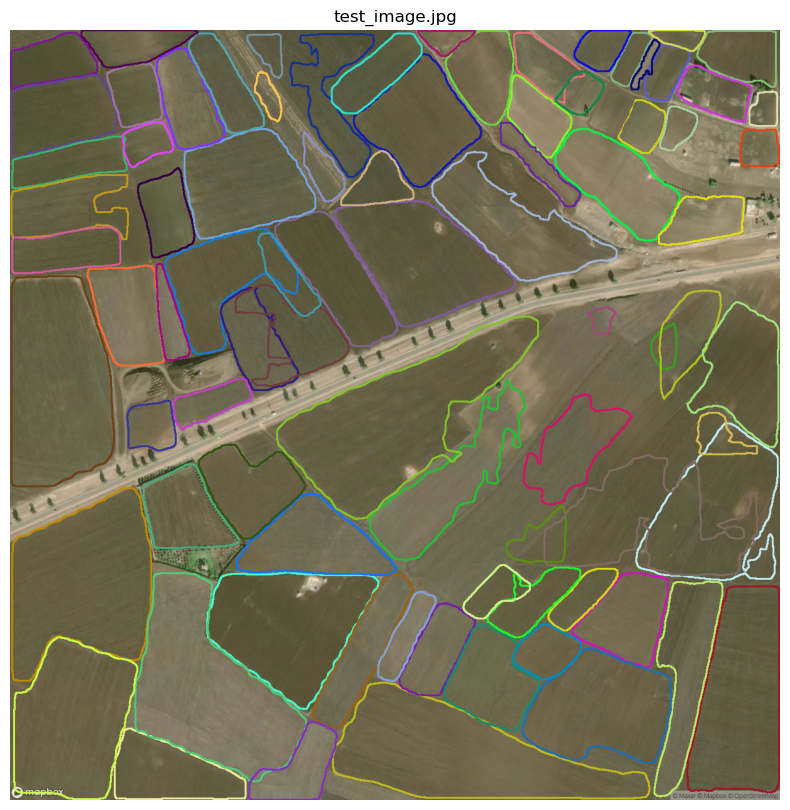

In [6]:
from src.inference import run_inference_detectronv2
output_folder = "/Users/Hiba/satellite-imagery-pfe/data/feild_del"
run_inference_detectronv2(image_path, output_folder)

In [15]:
annotation_file  = 'C:/Users/XPRISTO/OneDrive/Bureau/model_deployement/test_image6.json'
gdf_annotation = gdf.loc[6]
square_wkt, centroid = create_square_polygon(str(gdf_annotation['geometry']), square_size_km=2)
center_lat, center_lng = centroid
image_corners = calculate_image_bounds(center_lat, center_lng, DEFAULT_ZOOM, image_width, image_height)
print('image_corners',image_corners)
annotation_shapefile = convert_annotations_to_polygons(image_corners, annotation_file,image_width,image_height)
annotation_shapefile.to_file('C:/Users/XPRISTO/OneDrive/Bureau/model_deployement/kmls/test_image6.shp', driver='ESRI Shapefile')


image_corners (-4.689405645675151, 34.0440867381382, -4.676273550338237, 34.05496738679234)


In [8]:
annotation_shapefile

,geometry
0,"POLYGON ((-4.75112 34.07611, -4.75114 34.07609..."
1,"POLYGON ((-4.75205 34.06911, -4.75207 34.06909..."
2,"POLYGON ((-4.75293 34.06809, -4.75297 34.06805..."
3,"POLYGON ((-4.75434 34.07740, -4.75436 34.07738..."
4,"POLYGON ((-4.75393 34.07140, -4.75395 34.07138..."
5,"POLYGON ((-4.75090 34.06963, -4.75096 34.06958..."
6,"POLYGON ((-4.74753 34.06809, -4.74763 34.06800..."
7,"POLYGON ((-4.75065 34.06863, -4.75069 34.06860..."
8,"POLYGON ((-4.75131 34.06883, -4.75133 34.06882..."
9,"POLYGON ((-4.75264 34.06849, -4.75266 34.06848..."


In [9]:
kml_path = "C:/Users/XPRISTO/OneDrive/Bureau/model_deployement/kmls/test_image5.kml"
convert_to_kml(annotation_shapefile, kml_path)


In [10]:
import geopandas as gpd
import os

work_dir = os.getcwd()
gdf_list = []

gdf_0 = gpd.read_file(os.path.join(work_dir, 'test_image4.shp'))
# gdf_1 = gpd.read_file(os.path.join(work_dir, 'test_image1.shp'))
# gdf_2 = gpd.read_file(os.path.join(work_dir, 'test_image2.shp'))
# gdf_3 = gpd.read_file(os.path.join(work_dir, 'test_image3.shp'))

gdf_list.append(gdf_0)
# gdf_list.append(gdf_1)
# gdf_list.append(gdf_2)
# gdf_list.append(gdf_3)

print(f"Number of GeoDataFrames in list: {len(gdf_list)}")

2024-07-25 14:14:03,241 - ERROR - c:\Users\XPRISTO\OneDrive\Bureau\model_deployement\test_image4.shp: No such file or directory


DriverError: c:\Users\XPRISTO\OneDrive\Bureau\model_deployement\test_image4.shp: No such file or directory

In [19]:
import geopandas as gpd
import pandas as pd
from shapely import GeometryCollection
from shapely.ops import unary_union
from shapely.validation import make_valid
from shapely.geometry import Polygon, MultiPolygon

def project_to_utm(gdf):
    gdf_utm = gdf.to_crs(epsg=32630)
    return gdf_utm


def clean_geometries(gdf):
    def clean_geom(geom):
        if not geom.is_valid:
            geom = make_valid(geom)
        if isinstance(geom, (Polygon)):
            return geom
        elif isinstance(geom, GeometryCollection):
            polys = [g for g in geom.geoms if isinstance(g, (Polygon, MultiPolygon))]
            if polys:
                return unary_union(polys)
        return None
    
    gdf['geometry'] = gdf['geometry'].apply(clean_geom)
    return gdf.dropna(subset=['geometry'])


In [20]:
def remove_duplicate_parcels(gdf_list, tolerance=1e-7, min_area=None):
    combined_gdf = gpd.GeoDataFrame(pd.concat([clean_geometries(gdf) for gdf in gdf_list], ignore_index=True))
    combined_gdf = combined_gdf.set_geometry('geometry')

    # Project to UTM for area calculation
    combined_gdf_utm = project_to_utm(combined_gdf)

    # Calculate areas in square meters
    combined_gdf_utm['area_m2'] = combined_gdf_utm.geometry.area

    if min_area is not None:
        combined_gdf_utm = combined_gdf_utm[combined_gdf_utm['area_m2'] >= min_area]

    sindex = combined_gdf_utm.sindex

    def find_duplicates(geom):
        possible_matches_index = list(sindex.intersection(geom.bounds))
        possible_matches = combined_gdf_utm.iloc[possible_matches_index]
        precise_matches = possible_matches[possible_matches.geometry.intersects(geom)]
        return precise_matches[precise_matches.geometry != geom]

    to_remove = []
    for idx, row in combined_gdf_utm.iterrows():
        try:
            duplicates = find_duplicates(row.geometry)
            if not duplicates.empty:
                # Keep the polygon with the larger area
                areas = [row['area_m2']] + list(duplicates['area_m2'])
                max_area_index = areas.index(max(areas))
                to_remove.extend(duplicates.index.tolist() if max_area_index == 0 else [idx] + duplicates.index.tolist()[:max_area_index-1] + duplicates.index.tolist()[max_area_index:])
        except Exception as e:
            print(f"Error processing row {idx}: {e}")

    final_parcels = combined_gdf_utm.drop(index=list(set(to_remove)))

    final_parcels = final_parcels[final_parcels.geometry.type.isin(['Polygon'])]

    final_parcels = final_parcels.reset_index(drop=True)

    final_parcels = final_parcels.to_crs(epsg=4326)

    return final_parcels

In [25]:
final_parcels = remove_duplicate_parcels(gdf_list, min_area = 100)

In [26]:
final_parcels

,FID,geometry,area_m2
0,0,"POLYGON ((-4.73068 33.99148, -4.73023 33.99148...",20349.822299
1,1,"POLYGON ((-4.72278 33.99216, -4.72259 33.99216...",14379.525376
2,4,"POLYGON ((-4.73361 33.99576, -4.73148 33.99576...",73882.181182
3,5,"POLYGON ((-4.72499 33.98724, -4.72481 33.98724...",14766.693009
4,6,"POLYGON ((-4.72339 33.99576, -4.72268 33.99576...",15584.335664
...,...,...,...
61,118,"POLYGON ((-4.72926 33.98719, -4.72900 33.98719...",1772.496111
62,120,"POLYGON ((-4.72337 33.99508, -4.72325 33.99508...",935.344169
63,121,"POLYGON ((-4.73177 33.98535, -4.73162 33.98535...",3028.151063
64,122,"POLYGON ((-4.72867 33.98991, -4.72848 33.98991...",1405.790620


In [27]:
kml_path = "C:/Users/XPRISTO/OneDrive/Bureau/model_deployement/kmls/filter_area_100.kml"
convert_to_kml(final_parcels, kml_path)


In [39]:
df = gpd.read_file("test_image0.shp")

df


,FID,geometry
0,0,"POLYGON ((-4.73068 33.99148, -4.73023 33.99148..."
1,1,"POLYGON ((-4.72278 33.99216, -4.72259 33.99216..."
2,2,"POLYGON ((-4.73230 33.98705, -4.73209 33.98705..."
3,3,"POLYGON ((-4.72778 33.98875, -4.72768 33.98875..."
4,4,"POLYGON ((-4.73361 33.99576, -4.73148 33.99576..."
...,...,...
123,123,"POLYGON ((-4.72315 33.99474, -4.72300 33.99474..."
124,124,"POLYGON ((-4.73320 33.98766, -4.73302 33.98766..."
125,125,"POLYGON ((-4.72212 33.99188, -4.72210 33.99188..."
126,126,"POLYGON ((-4.73199 33.98862, -4.73179 33.98862..."
